In [194]:
from matplotlib import font_manager

In [200]:
from transformers import (
    AutoConfig, AutoTokenizer, 
    AutoModelForSequenceClassification
)
from pathlib import Path
import pickle
import torch
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Microsoft JhengHei"

In [13]:
model_dir = "../../data/model/absa-seq"
tokenizer = AutoTokenizer.from_pretrained(model_dir)
model = AutoModelForSequenceClassification.from_pretrained(model_dir)

In [16]:
TARGET_DIR = "20210412"
result_dir = Path(f"../../data/annot_data/annotated_data_bkup/{TARGET_DIR}")
with open(result_dir / f"seq_pairs_{TARGET_DIR}.pkl", "rb") as fin:
    opinions = [x[0] for x in pickle.load(fin)]
with open(result_dir / f"noise_pairs_{TARGET_DIR}.pkl", "rb") as fin:
    noises = [x[0] for x in pickle.load(fin)]

In [239]:
tokenizer.decode([1,2,3])

'[unused1] [unused2] [unused3]'

In [263]:
intext = "學校宿舍的遠傳收訊很QQ"
def visualize_attention(intext):
    batch = tokenizer(intext, return_tensors="pt")
    tokens = tokenizer.convert_ids_to_tokens(batch["input_ids"][0])

    with torch.no_grad():
        out = model(**batch, output_attentions=True)
        att = out.attentions
        att = torch.stack([x[0, :, :, :] for x in att])
        att = att.permute(1, 0, 2, 3)
        pred = out.logits.argmax().item()
        print("Prediction: ", pred)        
    seq_len = att.size(2)
    
    plt.imshow(att[:, :, 0, 1:-1].sum(0).numpy(), cmap="hot")
    plt.gca().set_xticks(range(seq_len-2))
    plt.gca().set_xticklabels(tokens[1:-1], fontsize=14)
    return att, tokens

Prediction:  1


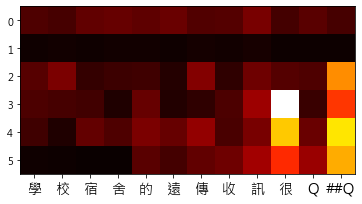

In [264]:
att, tokens = visualize_attention("學校宿舍的遠傳收訊很QQ");

Prediction:  1


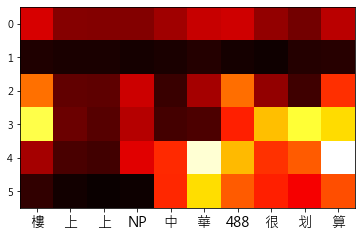

In [265]:
visualize_attention("樓上上NP中華488很划算");

Prediction:  1


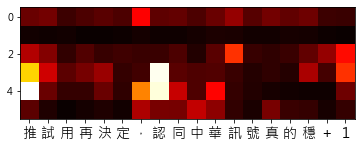

In [266]:
visualize_attention("推試用再決定，認同中華訊號真的穩+1");

Prediction:  1


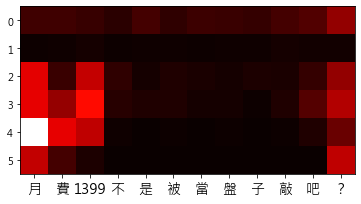

In [267]:
visualize_attention("月費1399不是被當盤子敲吧？");

Prediction:  1


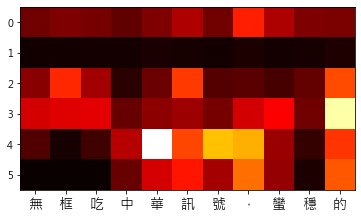

In [268]:
visualize_attention("無框吃中華訊號，蠻穩的");

Prediction:  0


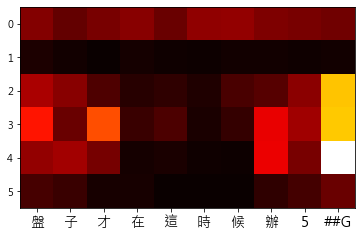

In [270]:
visualize_attention("盤子才在這時候辦5G");

In [186]:
# initialize seq_scores for each head
seq_scores = torch.eye(seq_len, seq_len)
for layer_i in range(n_layer):
    seq_scores = att[:, layer_i, :, :].matmul(seq_scores).mean(0)
    

In [182]:
att[:, layer_i, :, :].matmul(seq_scores).sum(0)

torch.Size([10, 10])

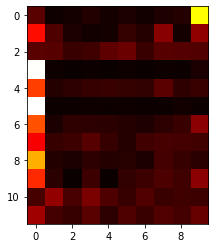

In [145]:
plt.imshow(seq_scores[:, 9, :], cmap="hot")

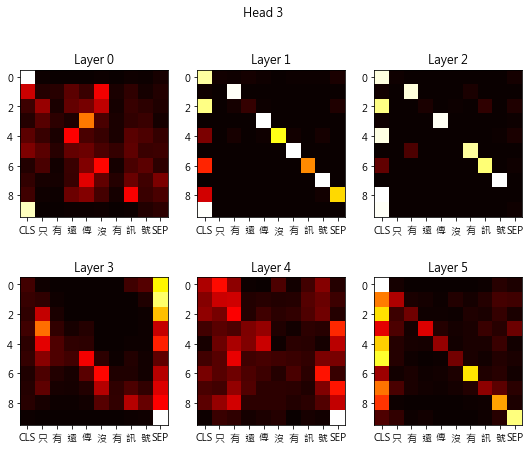

In [208]:
head_idx = 3
fig = plt.figure(figsize=(9, 7))
fig.suptitle("Head " + str(head_idx))
for i in range(n_layer):
    plt.subplot(2, 3, i+1)
    plt.title("Layer " + str(i))
    plt.imshow(att[head_idx, i, :, :].numpy(), cmap="hot")    
    plt.gca().set_xticks(range(seq_len))
    plt.gca().set_xticklabels(["CLS"] + list(intext) + ["SEP"])

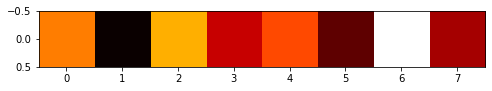

In [190]:
plt.figure(figsize=(8,8))
plt.imshow(seq_scores.numpy()[0:1, 1:-1], cmap="hot")

In [45]:
plt.imshow(att[5, :, :].numpy().squeeze(), cmap="hot")

torch.Size([6, 10, 10])

In [48]:
cls_att.sum(2)

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000]])